In [1]:
from IPython.display import display, Math, Latex
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print('Lane-Emden Equation')
display(Latex(r'$'\
              r'\dfrac{\text{d}}{\text{d}\xi}'\
              r'\left( \xi^2 \dfrac{\text{d}\theta}{\text{d}\xi} \right)'\
              r'='\
              r'-\xi^2\theta^n'\
              r'$'))

print("Separation of variables")
display(Latex(r'$'\
              r'\dfrac{\text{d}y}{\text{d}\xi}'\
              r'='\
              r'\dfrac{z}{\xi^2}'\
              r'$'))
display(Latex(r'$'\
              r'\dfrac{\text{d}z}{\text{d}\xi}'\
              r'='\
              r'-\xi^2y^n'\
              r'$'))

Lane-Emden Equation


<IPython.core.display.Latex object>

Separation of variables


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[0.9999999983333333, -3.333333333333334e-13]


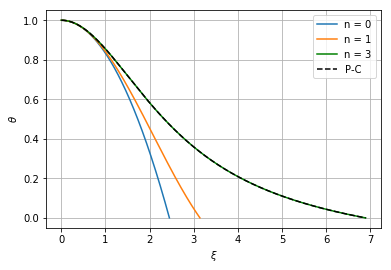

In [3]:
def solveLaneEmden(log_delta_xi=-4, n=3):
    delta_xi = 10**log_delta_xi
    
    # Inner boundary condition 
    y0 = 1 - delta_xi**2/6 
    z0 = -delta_xi**3/3 
    
    print([y0, z0])
    
    ys  = [y0]
    zs  = [z0]
    xis = [delta_xi]
    ycs = [y0]
    zcs = [z0]
    while True:
        y  =  ys[len(ys)  - 1]
        z  =  zs[len(zs)  - 1]
        xi = xis[len(xis) - 1]
        yc = ycs[len(ycs) - 1]
        zc = zcs[len(zcs) - 1]
        
        ## Primitive method 
        yi = y + delta_xi * z/xi**2
        zi = z + delta_xi * -xi**2*y**n
        
        ## Predictor-corrector technique 
        xii = xi + delta_xi
        yci = yc + 1/2 * delta_xi * (z/xi**2 + zi/xii**2)
        zci = zc + 1/2 * delta_xi * (-xi**2*y**n - xi**2*yi**n)
        
        # Outer boundary condition 
        if (yi < 1e-10 or yci < 1e-10): break
        
        xis += [xii]
        ys  += [yi]
        zs  += [zi]
        ycs += [yci]
        zcs += [zci]
    
    return (xis, ys, ycs)

def plotLaneEmden(log_delta_xi=-4, n=3):
    xis, ys, ycs = solveLaneEmden(log_delta_xi, n)
    
    xi2 = np.arange(0, np.sqrt(6), 1e-3)
    plt.plot(xi2, 1-xi2**2/6, label='n = 0')
    
    xi2 = np.arange(0, np.pi, 1e-3)
    plt.plot(xi2, np.sin(xi2)/xi2, label='n = 1')
    
    plt.plot(xis, ys,  'g',   label='n = '+str(n))
    plt.plot(xis, ycs, 'k--', label='P-C')
    
    plt.legend(loc='best')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\theta$')
    plt.grid()

plotLaneEmden()

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets

interact(plotLaneEmden, 
         n=FloatSlider(min=0, max=4.99, step=0.01, value=3, continuous_update=False),
         log_delta_xi=FloatSlider(min=-6, max=0.1, step=0.01, value=-2, continuous_update=False));

interactive(children=(FloatSlider(value=-2.0, continuous_update=False, description='log_delta_xi', max=0.1, mi…